In [36]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    recall_score,
    f1_score,
    classification_report,
    PrecisionRecallDisplay,
    precision_recall_curve,
    roc_curve,
    roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [4]:
og_df = pd.read_csv('pokemon.csv')
og_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [5]:
og_df['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [6]:
type_color_dict = {
    'grass': "#78C850",
    'fire': "#FF4422",
    'water': "#3399FF",
    'bug': "#A8B820",
    'normal': "#A8A878",
    'poison': "#A040A0",
    'electric': "#F8D030",
    'ground': "#E0C068",
    'fairy': "#EE99AC",
    'fighting': "#C03028",
    'psychic': "#F85888",
    'rock': "#8A7E46FF",
    'ghost': "#705898",
    'ice': "#98D8D8",
    'dragon': "#7038F8",
    'dark': "#705848",
    'steel': "#B8B8D0",
    'flying': "#A890F0"
}

In [7]:
og_df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [8]:
# Check for non-numeric values in 'capture_rate'
non_numeric_idx = []
for i, val in enumerate(og_df['capture_rate']):
    try:
        float(val)
    except ValueError:
        non_numeric_idx.append(i)
        print(f"Non-numeric value found: \"{val}\" in row {i}")

Non-numeric value found: "30 (Meteorite)255 (Core)" in row 773


In [9]:
# Handle Minior forms
minior_idx = non_numeric_idx[0]

# Create a copy for Minior (Meteorite)
minior_meteorite = og_df.loc[minior_idx].copy()
minior_meteorite['name'] = 'Minior (Meteorite)'
minior_meteorite['capture_rate'] = 30

# Update original to Minior (Core)
og_df.loc[minior_idx, 'name'] = 'Minior (Core)'
og_df.loc[minior_idx, 'capture_rate'] = 255

# Add the new row to the dataframe
og_df = pd.concat([og_df, minior_meteorite.to_frame().T], ignore_index=True)

In [10]:
# Find columns with missing values
cols_with_na = og_df.columns[og_df.isna().any()].tolist()
for attr in cols_with_na:
    print(f"Missing values in column '{attr}':")
    print(og_df[og_df[attr].isna()]['name'].tolist())

Missing values in column 'height_m':
['Rattata', 'Raticate', 'Raichu', 'Sandshrew', 'Sandslash', 'Vulpix', 'Ninetales', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Geodude', 'Graveler', 'Golem', 'Grimer', 'Muk', 'Exeggutor', 'Marowak', 'Hoopa', 'Lycanroc']
Missing values in column 'percentage_male':
['Magnemite', 'Magneton', 'Voltorb', 'Electrode', 'Staryu', 'Starmie', 'Ditto', 'Porygon', 'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew', 'Unown', 'Porygon2', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-Oh', 'Celebi', 'Shedinja', 'Lunatone', 'Solrock', 'Baltoy', 'Claydol', 'Beldum', 'Metang', 'Metagross', 'Regirock', 'Regice', 'Registeel', 'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys', 'Bronzor', 'Bronzong', 'Magnezone', 'Porygon-Z', 'Rotom', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Regigigas', 'Giratina', 'Phione', 'Manaphy', 'Darkrai', 'Shaymin', 'Arceus', 'Victini', 'Klink', 'Klang', 'Klinklang', 'Cryogonal', 'Golett', 'Golurk', 'Cobalion', 'Terrakion', 'Virizion', 'Resh

In [11]:
# Fill height and weight missing values with real values

og_df.loc[og_df['name'] == 'Rattata', 'height_m'] = 0.3
og_df.loc[og_df['name'] == 'Rattata', 'weight_kg'] = 3.5

og_df.loc[og_df['name'] == 'Raticate', 'height_m'] = 0.7
og_df.loc[og_df['name'] == 'Raticate', 'weight_kg'] = 18.5

og_df.loc[og_df['name'] == 'Raichu', 'height_m'] = 0.8
og_df.loc[og_df['name'] == 'Raichu', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Sandshrew', 'height_m'] = 0.6
og_df.loc[og_df['name'] == 'Sandshrew', 'weight_kg'] = 12

og_df.loc[og_df['name'] == 'Sandslash', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Sandslash', 'weight_kg'] = 29.5

og_df.loc[og_df['name'] == 'Vulpix', 'height_m'] = 0.6
og_df.loc[og_df['name'] == 'Vulpix', 'weight_kg'] = 9.9

og_df.loc[og_df['name'] == 'Ninetales', 'height_m'] = 1.1
og_df.loc[og_df['name'] == 'Ninetales', 'weight_kg'] = 19.9

og_df.loc[og_df['name'] == 'Diglett', 'height_m'] = 0.2
og_df.loc[og_df['name'] == 'Diglett', 'weight_kg'] = 0.8

og_df.loc[og_df['name'] == 'Dugtrio', 'height_m'] = 0.7
og_df.loc[og_df['name'] == 'Dugtrio', 'weight_kg'] = 33.3

og_df.loc[og_df['name'] == 'Meowth', 'height_m'] = 0.4
og_df.loc[og_df['name'] == 'Meowth', 'weight_kg'] = 4.2

og_df.loc[og_df['name'] == 'Persian', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Persian', 'weight_kg'] = 32

og_df.loc[og_df['name'] == 'Geodude', 'height_m'] = 0.4
og_df.loc[og_df['name'] == 'Geodude', 'weight_kg'] = 20

og_df.loc[og_df['name'] == 'Graveler', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Graveler', 'weight_kg'] = 105

og_df.loc[og_df['name'] == 'Golem', 'height_m'] = 1.4
og_df.loc[og_df['name'] == 'Golem', 'weight_kg'] = 300

og_df.loc[og_df['name'] == 'Grimer', 'height_m'] = 0.9
og_df.loc[og_df['name'] == 'Grimer', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Muk', 'height_m'] = 1.2
og_df.loc[og_df['name'] == 'Muk', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Exeggutor', 'height_m'] = 2
og_df.loc[og_df['name'] == 'Exeggutor', 'weight_kg'] = 120

og_df.loc[og_df['name'] == 'Marowak', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Marowak', 'weight_kg'] = 45

og_df.loc[og_df['name'] == 'Hoopa', 'height_m'] = 6.5
og_df.loc[og_df['name'] == 'Hoopa', 'weight_kg'] = 490

og_df.loc[og_df['name'] == 'Lycanroc', 'height_m'] = 1.1
og_df.loc[og_df['name'] == 'Lycanroc', 'weight_kg'] = 25

In [12]:
# Handle sexless pokemon
# og_df['percentage_male'] = pd.to_numeric(og_df['percentage_male'], errors='coerce')

# make column indicating if pokemon has gender with values 1 if it one and 0 if not
og_df["has_sex"] = og_df['percentage_male'].apply(lambda x: 0 if pd.isna(x) else 1)
og_df['percentage_male'] = og_df['percentage_male'].fillna(0)

# Check if all NaNs are gone
cols_with_na = og_df.columns[og_df.isna().any()].tolist()
cols_with_na

['type2']

In [13]:
# Remove name, japanese name, classification, abilities and type match-up attributes
df = og_df.copy()
for attr in og_df.columns:
    if attr in ['name', 'japanese_name', 'classfication', 'abilities'] or attr.startswith('against_'):
        df = df.drop(columns=[attr])

In [14]:
# Make attributes numerical
for attr in df.columns:
    if attr not in ['type1', 'type2']:
        df[attr] = pd.to_numeric(df[attr])

df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,has_sex
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,1,65,65,45,grass,poison,6.9,1,0,1
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,2,80,80,60,grass,poison,13.0,1,0,1
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,3,122,120,80,grass,poison,100.0,1,0,1
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,4,60,50,65,fire,NaN,8.5,1,0,1
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,5,80,65,80,fire,NaN,19.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,181,30720,0,570,255,131,1250000,0.3,59,0.0,798,59,31,109,grass,steel,0.1,7,1,0
798,101,30720,0,570,15,53,1250000,5.5,223,0.0,799,97,53,43,dark,dragon,888.0,7,1,0
799,107,30720,0,600,3,101,1250000,2.4,97,0.0,800,127,89,79,psychic,NaN,230.0,7,1,0
800,95,30720,0,600,3,115,1250000,1.0,80,0.0,801,130,115,65,steel,fairy,80.5,7,1,0


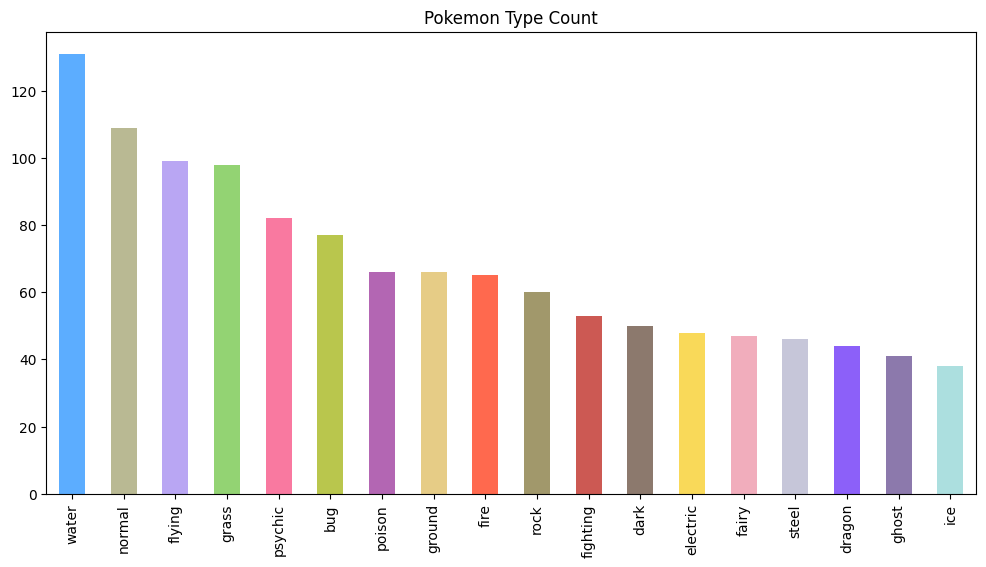

In [15]:
# histogram of each type1 and type2
type1_counts = df['type1'].value_counts()
type2_counts = df['type2'].value_counts()
type_counts = type1_counts.add(type2_counts, fill_value=0).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar', color=[type_color_dict[t] for t in type_counts.index], alpha=0.8)
plt.title('Pokemon Type Count')
plt.show()

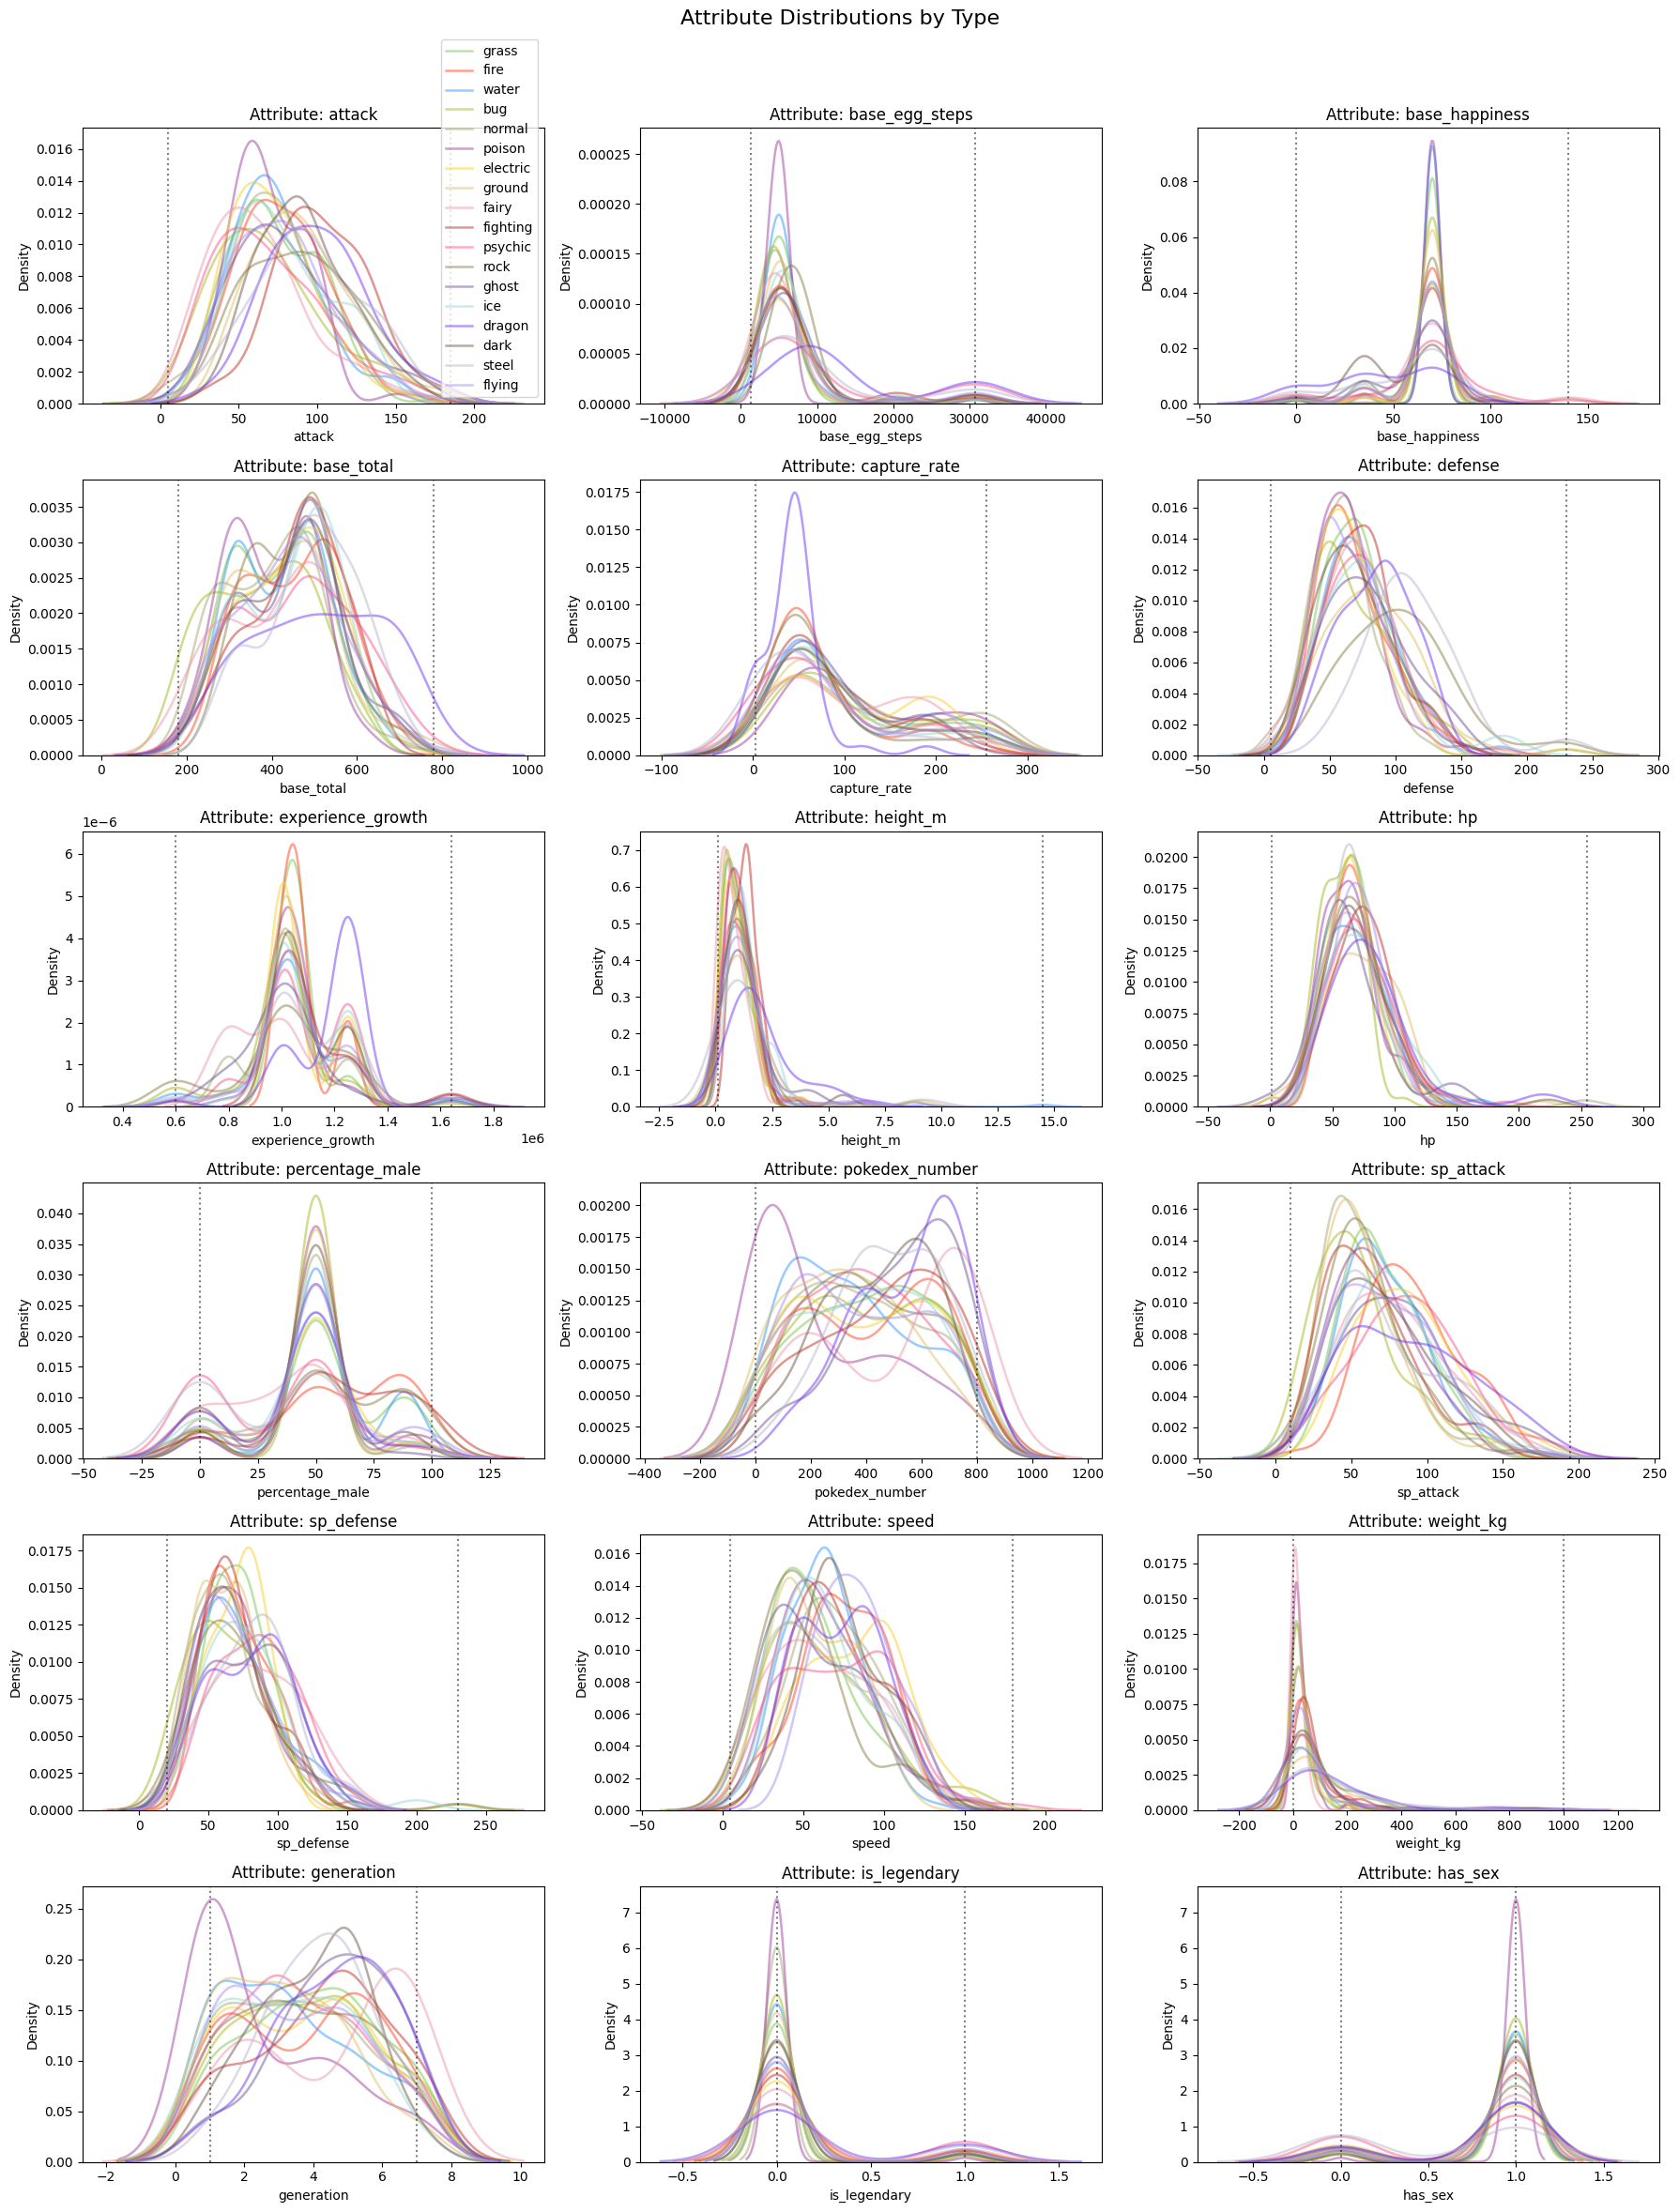

In [16]:
fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

attributes = [col for col in df if col not in ['type1', 'type2']]

for i, attr in enumerate(attributes):
    # Get min and max value for current attribute
    max_val = df[attr].max()
    min_val = df[attr].min()
    
    # Plot KDE for each type1
    for t in df['type1'].unique():
        # donem igual importancia al tipus 1 que al 2
        subset1 = df[df['type1'] == t][attr]
        subset2 = df[df['type2'] == t][attr]
        subset = pd.concat([subset1, subset2])
        sns.kdeplot(subset, ax=axes[i], label=t, color=type_color_dict[t], fill=False, alpha=0.5, linewidth=1.8)
    
    # Plot min and max values
    axes[i].axvline(min_val, color='black', linestyle=':', alpha=0.5, linewidth=1.5)
    axes[i].axvline(max_val, color='black', linestyle=':', alpha=0.5, linewidth=1.5)

    axes[i].set_title(f'Attribute: {attr}')
    if i == 0:
        axes[i].legend()

fig.suptitle('Attribute Distributions by Type', fontsize=16)
plt.tight_layout()
plt.show()

- Auc-roc mitjà
- Accuracy
- Classification report de scikitlearn
- Matriu de confusió

In [17]:
# make one-hot array for types
types = df['type1'].unique().tolist()
for t in types:
    df[f"is_{t}"] = 0
    df.loc[(df['type1'] == t) | (df['type2'] == t), f"is_{t}"] = 1

df = df.drop(columns=["type1", "type2"])
df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,...,is_fairy,is_fighting,is_psychic,is_rock,is_ghost,is_ice,is_dragon,is_dark,is_steel,is_flying
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,...,0,0,0,0,0,0,0,0,0,0
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,...,0,0,0,0,0,0,0,0,0,0
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,...,0,0,0,0,0,0,0,0,0,0
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,...,0,0,0,0,0,0,0,0,0,0
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,181,30720,0,570,255,131,1250000,0.3,59,0.0,...,0,0,0,0,0,0,0,0,1,0
798,101,30720,0,570,15,53,1250000,5.5,223,0.0,...,0,0,0,0,0,0,1,1,0,0
799,107,30720,0,600,3,101,1250000,2.4,97,0.0,...,0,0,1,0,0,0,0,0,0,0
800,95,30720,0,600,3,115,1250000,1.0,80,0.0,...,1,0,0,0,0,0,0,0,1,0


In [18]:
def z_score_all_but_targets(df: pd.DataFrame) -> pd.DataFrame:
    # normalize all columns except target columns (the ones that start with "is_")
    df_new = df.copy()
    cols = df.columns.tolist()
    for col in cols:
        if not col.startswith("is_") and col != "has_sex":
            mean = df_new[col].mean()
            std = df_new[col].std()
            df_new[col] = (df_new[col] - mean) / std
    return df_new

In [19]:
df = z_score_all_but_targets(df)
df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,...,is_fairy,is_fighting,is_psychic,is_rock,is_ghost,is_ice,is_dragon,is_dark,is_steel,is_flying
0,-0.898503,-0.315833,0.236487,-0.927073,-0.705100,-0.780159,0.030333,-0.425766,-0.901598,1.514045,...,0,0,0,0,0,0,0,0,0,0
1,-0.494126,-0.315833,0.236487,-0.196938,-0.705100,-0.324924,0.030333,-0.149500,-0.336867,1.514045,...,0,0,0,0,0,0,0,0,0,0
2,0.687898,-0.315833,0.236487,1.649381,-0.705100,1.626081,0.030333,0.771385,0.416108,1.514045,...,0,0,0,0,0,0,0,0,0,0
3,-0.805185,-0.315833,0.236487,-1.002605,-0.705100,-0.975259,0.030333,-0.517854,-1.127491,1.514045,...,0,0,0,0,0,0,0,0,0,0
4,-0.431914,-0.315833,0.236487,-0.196938,-0.705100,-0.487508,0.030333,-0.057412,-0.412165,1.514045,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,3.207475,3.590069,-3.337240,1.187802,2.043557,1.886215,1.217552,-0.794120,-0.374516,-1.841380,...,0,0,0,0,0,0,0,0,1,0
798,0.719004,3.590069,-3.337240,1.187802,-1.097766,-0.650092,1.217552,3.994483,5.799880,-1.841380,...,0,0,0,0,0,0,1,1,0,0
799,0.905639,3.590069,-3.337240,1.439572,-1.254832,0.910712,1.217552,1.139739,1.056137,-1.841380,...,0,0,1,0,0,0,0,0,0,0
800,0.532368,3.590069,-3.337240,1.439572,-1.254832,1.365947,1.217552,-0.149500,0.416108,-1.841380,...,1,0,0,0,0,0,0,0,1,0


In [20]:
X = df.drop(columns=[f"is_{_type}" for _type in types])
# X = X.drop(columns=["has_sex"])
# Y is the binary type matrix
Y = df[[f"is_{_type}" for _type in types]]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)

In [22]:
def split_Y(Y, target): 
    return Y[f"is_{target}"]

In [23]:
parameter_grids = {
    # treiem LR i KNN perquè no donaven bons resultats
    'SVM': (
        SVC(probability=True), {
            'C': [0.1, 0.5, 1, 5, 10],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],    
            'gamma': ['scale', 0.001, 0.01, 0.1], 
            'class_weight': ['balanced'] 
        }
    ),
    'RF': (
        RandomForestClassifier(), {
            'n_estimators': [50, 75, 100, 125, 150],   
            'max_depth': [None, 3, 5, 7, 10, 15, 20],          
            'min_samples_split': [2, 4, 6, 10],   
            'min_samples_leaf': [1, 2, 3, 5],    
            'max_features': ['sqrt', 'log2']
        }
    ),
    'GB': (
        GradientBoostingClassifier(), {
            'n_estimators': [50, 100, 150, 200, 250, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [2, 3, 4, 5, 10, 15, 20],
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [1, 2, 3, 5],
            'subsample': [0.5, 0.7, 0.8],
            'max_features': ['sqrt', 'log2'] 
        }
    )
}

In [ ]:
for i, t in enumerate(types):
    models = {}
    X = X_train
    y = split_Y(Y_train, target=t)

    best_model = None
    print(f"\n{i+1}. {t}")
    for model_name, (model, param_grid) in parameter_grids.items():
        grid_search = RandomizedSearchCV(model, param_grid, cv=20, n_iter=30,scoring='f1', n_jobs=-1, refit=True, verbose=0)
        grid_search.fit(X, y)
        
        models[model_name] = grid_search
        if best_model is None or grid_search.best_score_ > best_model.best_score_:
            best_model = grid_search
        
        print(f"{model_name}: {grid_search.best_score_:.4f} -> {grid_search.best_params_}")

In [25]:
model_by_type = {
    "grass": SVC(kernel='linear', gamma=0.001, class_weight='balanced', C=10, probability=True),
    "fire": SVC(kernel='poly', gamma=0.1, class_weight='balanced', C=5, probability=True),
    "water": SVC(kernel='rbf', gamma='scale', class_weight='balanced', C=10, probability=True),
    "bug": SVC(kernel='poly', gamma='scale', class_weight='balanced', C=10, probability=True),
    "normal": SVC(kernel='linear', gamma=0.001, class_weight='balanced', C=0.1, probability=True),
    "poison": SVC(kernel='linear', gamma=0.01, class_weight='balanced', C=1, probability=True),
    "electric": SVC(kernel='rbf', gamma='scale', class_weight='balanced', C=1, probability=True),
    "ground": SVC(kernel='rbf', gamma=0.1, class_weight='balanced', C=10, probability=True),
    "fairy": GradientBoostingClassifier(subsample=0.8, n_estimators=150, min_samples_split=6, min_samples_leaf=5, max_features='sqrt', max_depth=3, learning_rate=0.05),
    "fighting": SVC(kernel='rbf', gamma=0.01, class_weight='balanced', C=1, probability=True),
    "psychic": SVC(kernel='rbf', gamma=0.01, class_weight='balanced', C=10, probability=True),
    "rock": GradientBoostingClassifier(subsample=0.5, n_estimators=300, min_samples_split=4, min_samples_leaf=2, max_features='log2', max_depth=4, learning_rate=0.1),
    "ghost": SVC(kernel='rbf', gamma='scale', class_weight='balanced', C=5, probability=True),
    "ice": SVC(kernel='linear', gamma=0.1, class_weight='balanced', C=10, probability=True),
    "dragon": SVC(kernel='rbf', gamma='scale', class_weight='balanced', C=1, probability=True),
    "dark": SVC(kernel='linear', gamma=0.001, class_weight='balanced', C=0.5, probability=True),
    "steel": SVC(kernel='rbf', gamma=0.001, class_weight='balanced', C=1, probability=True),
    "flying": SVC(kernel='rbf', gamma=0.1, class_weight='balanced', C=5, probability=True)
}

In [26]:
# train type models
for t in types:
    model = model_by_type[t]
    X = X_train
    y = split_Y(Y_train, target=t)
    model.fit(X, y)

In [27]:
# test each model and give f1 score in training and test
for i, t in enumerate(types):
    model = model_by_type[t]
    X_train_t = X_train
    y_train_t = split_Y(Y_train, target=t)
    y_train_pred = model.predict(X_train_t)
    f1_train = f1_score(y_train_t, y_train_pred)

    X_test_t = X_test
    y_test_t = split_Y(Y_test, target=t)
    y_test_pred = model.predict(X_test_t)
    f1_test = f1_score(y_test_t, y_test_pred)

    print(f"{i+1}. {t} - F1 Train: {f1_train:.4f}, F1 Test: {f1_test:.4f}")

1. grass - F1 Train: 0.3273, F1 Test: 0.2614
2. fire - F1 Train: 0.7111, F1 Test: 0.2115
3. water - F1 Train: 0.7518, F1 Test: 0.0000
4. bug - F1 Train: 0.7389, F1 Test: 0.2619
5. normal - F1 Train: 0.4405, F1 Test: 0.4062
6. poison - F1 Train: 0.3136, F1 Test: 0.0000
7. electric - F1 Train: 0.3978, F1 Test: 0.1778
8. ground - F1 Train: 0.8444, F1 Test: 0.0000
9. fairy - F1 Train: 0.9524, F1 Test: 0.0000
10. fighting - F1 Train: 0.2938, F1 Test: 0.2824
11. psychic - F1 Train: 0.5253, F1 Test: 0.2083
12. rock - F1 Train: 1.0000, F1 Test: 0.2069
13. ghost - F1 Train: 0.8182, F1 Test: 0.1000
14. ice - F1 Train: 0.2379, F1 Test: 0.0800
15. dragon - F1 Train: 0.7692, F1 Test: 0.4000
16. dark - F1 Train: 0.3256, F1 Test: 0.0708
17. steel - F1 Train: 0.4106, F1 Test: 0.1928
18. flying - F1 Train: 0.7383, F1 Test: 0.3784


In [47]:
class TypeOVA():

    def __init__(self, models):
        self.models = models
        self.types = list(models.keys())

    def fit(self, X, Y):
        for i, t in enumerate(self.types):
            self.models[t].fit(X, Y.values[:, i])
        return self
    
    def predict(self, stats):
        results = dict()
        for t in self.types:
            proba = self.models[t].predict_proba([stats])[0][1]
            results[t] = proba
        return results
    
    def get_accuracy(self, X, Y):
        acc1 = 0
        acc2 = 0
        for stats, _type in zip(X.values, Y.values):
            probs = [float(e) for e in self.predict(stats).values()]
            best_probs_idx = list(np.array(probs).argsort()[-2:][::-1])
            if probs[best_probs_idx[1]] < 0.5:
                best_probs_idx = [best_probs_idx[0]]

            real_idx = list(np.array(_type.tolist()).argsort()[-2:][::-1])

            if any(idx in real_idx for idx in best_probs_idx):
                acc1 += 1
            if set(best_probs_idx) == set(real_idx):
                acc2 += 1
            
        return acc1/len(X), acc2/len(X)
    
    def find_best_threshold(self, true, probs):
        best_f1 = 0
        best_threshold = 0
        for thr in np.linspace(0,1,101):
            preds = (probs >= thr)
            f1 = f1_score(true, preds)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = thr
        return best_threshold, best_f1
    
    def get_f1(self, X, Y):
        all_probs = []
        all_true = []
        for stats, _type in zip(X.values, Y.values):
            probs = [float(e) for e in self.predict(stats).values()]
            all_probs.append(probs)
            all_true.append(_type.tolist())
        
        all_probs = np.array(all_probs)
        all_true = np.array(all_true)
        f1_scores = dict()
        for i, t in enumerate(self.types):
            thr, f1 = self.find_best_threshold(all_true[:,i], all_probs[:,i])
            f1_scores[t] = f1
        
        return f1_scores
    
    def get_roc_auc(self, X, Y):
        all_probs = []
        all_true = []
        for stats, _type in zip(X.values, Y.values):
            probs = [float(e) for e in self.predict(stats).values()]
            all_probs.append(probs)
            all_true.append(_type.tolist())
        
        all_probs = np.array(all_probs)
        all_true = np.array(all_true)
        ra_scores = dict()
        for i, t in enumerate(self.types):
            roc_auc = roc_auc_score(all_true[:,i], all_probs[:,i])
            ra_scores[t] = roc_auc
        
        return ra_scores

In [48]:
ova = TypeOVA(model_by_type)
ova.fit(X_train, Y_train)
print(ova.get_f1(X_train, Y_train))
print(ova.get_f1(X_test, Y_test))

{'grass': 0.3557692307692308, 'fire': 0.7966101694915254, 'water': 0.8354430379746836, 'bug': 0.7938931297709924, 'normal': 0.5, 'poison': 0.43795620437956206, 'electric': 0.6904761904761905, 'ground': 0.9661016949152542, 'fairy': 1.0, 'fighting': 0.5135135135135135, 'psychic': 0.6906474820143885, 'rock': 1.0, 'ghost': 0.9818181818181818, 'ice': 0.3057324840764331, 'dragon': 0.96, 'dark': 0.41379310344827586, 'steel': 0.49056603773584906, 'flying': 0.9259259259259259}
{'grass': 0.27906976744186046, 'fire': 0.2857142857142857, 'water': 0.25, 'bug': 0.375, 'normal': 0.46153846153846156, 'poison': 0.10084033613445378, 'electric': 0.375, 'ground': 0.15384615384615385, 'fairy': 0.375, 'fighting': 0.3333333333333333, 'psychic': 0.23529411764705882, 'rock': 0.26666666666666666, 'ghost': 0.16049382716049382, 'ice': 0.10810810810810811, 'dragon': 0.5128205128205128, 'dark': 0.1, 'steel': 0.32432432432432434, 'flying': 0.4782608695652174}
